# Naive Bayes Algorithm [[src](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)]

The simplest solutions are usually the most powerful ones, and Naïve Bayes is a good example of that. Despite the advances in Machine Learning in the last years, it has proven to not only be simple but also fast, accurate, and reliable.

It has been successfully used for many purposes, but it works particularly well with natural language processing (NLP) problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks. In this article, we will understand the Naïve Bayes algorithm and all essential concepts so that there is no room for doubts in understanding.

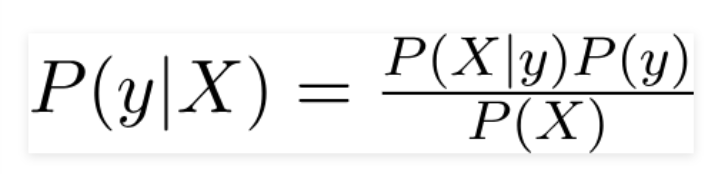

where `y` is the dependent variable and `X` is the input vector.

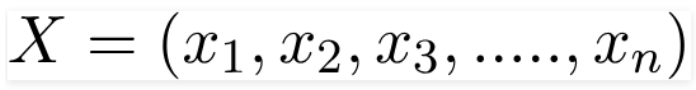

By substituting for X and expanding using the chain rule we get

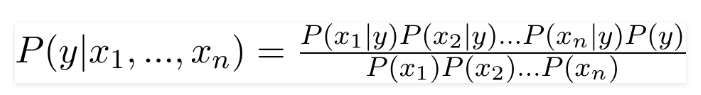

Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remains static. Therefore, the denominator can be removed and proportionality can be injected.

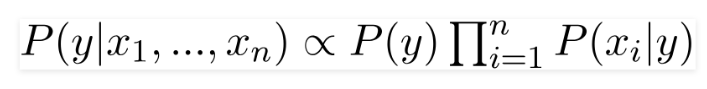

In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. **Therefore, we have to find the class variable(y) with maximum probability**. These probabilities could be very small, so to avoid underflow problem log operator was applied


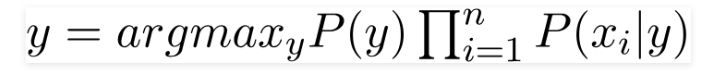



Using the above function, we can obtain the class, given the predictors/features.




Continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution.
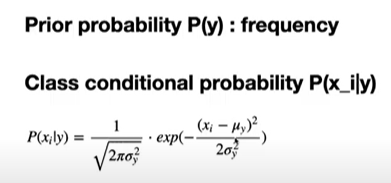

The posterior probability P(y|X) can be calculated by first, creating a Frequency Table for each attribute against the target. Then, molding the frequency tables to Likelihood Tables and finally, use the Naïve Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of the prediction.

**Refrences:** 
- [StatQuest: Gaussian Naive Bayes](https://www.youtube.com/watch?v=H3EjCKtlVog)
- [StatQuest: Naive Bayes Classifier](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
- [Krish Naik: Naive Bayes Classifier](https://www.youtube.com/watch?v=jS1CKhALUBQ)
- Wiki Links:
    - https://en.wikipedia.org/wiki/Naive_Bayes_classifier
    - https://en.wikipedia.org/wiki/Bayesian_statistics
    - https://en.wikipedia.org/wiki/Bayes%27_theorem

### Importing Libraries

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

### Building Naive Bayes Classifier

In [28]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Initializing mean, var & prior probabilites
        self.mean_ = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var_ = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors_ = np.zeros(n_classes, dtype=np.float64)
        
        # For each class calculate calculating mean, variance and prior probability
        # This is equivalent of creating likelihood table
        for idx, c in enumerate(self.classes_):
            # filtering samples belonging to class "c"
            X_c = X[y == c]
            # Caclulating mean & variance of each feature vector for class "c"
            self.mean_[idx, :] = X_c.mean(axis=0)
            self.var_[idx, :] = X_c.var(axis=0)
            # Calculating Prior probability of class "c"
            self.priors_[idx] = X_c.shape[0] / float(n_samples)
                     
    def predict(self, X):
        '''
        Performing prediction on given feature matrix 
        '''
        # Iterate through each row/input vector  and perform prediction
        y_pred = [self._predict(x) for x in X]
        print(y_pred)
        return np.array(y_pred)

    def _predict(self, x):
        '''
        Perfroming prediction on given row/input vector   
        '''
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.classes_):
            prior = np.log(self.priors_[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self.classes_[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        '''
        Calculates PDF for given input vector of specified class_idx
        '''
        mean = self.mean_[class_idx]
        var = self.var_[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

### Data Preparation

In [29]:
X, y = datasets.make_classification(
    n_samples=1000, n_features=10, n_classes=2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

### Model Training

In [30]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

print("####### Model Summary #######" )
print("Number of classes: ",nb.classes_)
print("Calculated of Means: ",nb.mean_)
print("Calculated of Variances: ",nb.var_)
print("Calculated of Priors: ",nb.priors_)

####### Model Summary #######
Number of classes:  [0 1]
Calculated of Means:  [[-0.00703519 -0.03829534 -0.27927146 -0.14663459 -0.04073089  0.04474489
   0.11201461  0.06311217 -1.036201    0.03944345]
 [-0.01370928  0.0759941   0.23715563  0.19411855 -0.04140421  0.0344645
  -0.05965791 -0.1024946   1.03415648  0.05188555]]
Calculated of Variances:  [[0.98269025 0.95576451 0.36205835 0.44312622 1.29896635 0.86864312
  1.03288266 0.89110435 0.33131845 0.95275246]
 [1.03305993 0.95375061 0.48209481 0.59179712 1.7236553  0.92576642
  0.96969459 1.10314154 0.50775021 1.14787765]]
Calculated of Priors:  [0.50375 0.49625]


### Model Prediction

In [31]:
predictions = nb.predict(X_test)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Naive Bayes classification accuracy 0.965


### Model Evaluation

In [32]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [33]:
print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965


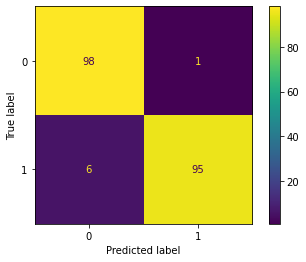

In [35]:
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()

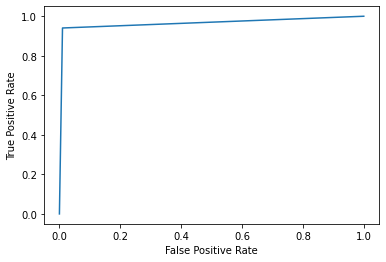

In [36]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()